In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import torch
import time

from utils.train import plot_samples, experiment, sampling
from PixelCNN.model import PixelCNN_model
from PixelRNN.model import PixelRNN_model
from data.MNIST import train_loader_mnist, test_loader_mnist

# Entrenamiento

## PixelCNN

In [ ]:
pixel_cnn = PixelCNN_model(num_channels=1, num_filters=32, num_layers=15)
cnn_train_losses, cnn_test_losses = experiment(model=pixel_cnn, epochs=10, train_loader=train_loader_mnist, test_loader=test_loader_mnist)

In [3]:
torch.save(pixel_cnn.state_dict(), 'models/pixel_cnn')

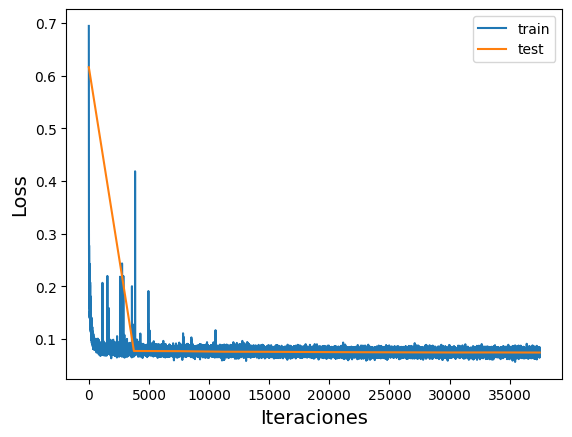

In [12]:
plt.plot(cnn_train_losses, label='train')
plt.plot(np.linspace(0, len(cnn_train_losses)-1, len(cnn_test_losses)), cnn_test_losses, label='test')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('cnn_loss.pdf', bbox_inches='tight')
plt.show()

## PixelRNN - Row

In [ ]:
row_pixel_rnn = PixelRNN_model(num_layers=4, num_filters=16, input_size=28, type_rnn='row')
row_train_losses, row_test_losses = experiment(model=row_pixel_rnn, epochs=10, train_loader=train_loader_mnist, test_loader=test_loader_mnist)

In [7]:
torch.save(row_pixel_rnn.state_dict(), 'models/pixel_row')

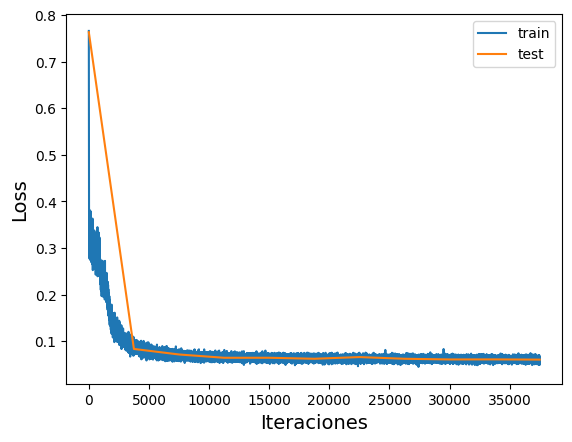

In [14]:
plt.plot(row_train_losses, label='train')
plt.plot(np.linspace(0, len(row_train_losses)-1, len(row_test_losses)), row_test_losses, label='test')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('rnn_row_loss.pdf', bbox_inches='tight')
plt.show()

## PixelRNN - Diagonal

In [ ]:
diag_pixel_rnn = PixelRNN_model(num_layers=4, num_filters=16, input_size=28, type_rnn='diagonal')
diag_train_losses, diag_test_losses = experiment(model=diag_pixel_rnn, epochs=10, train_loader=train_loader_mnist, test_loader=test_loader_mnist)

In [18]:
torch.save(diag_pixel_rnn.state_dict(), 'models/pixel_diag')

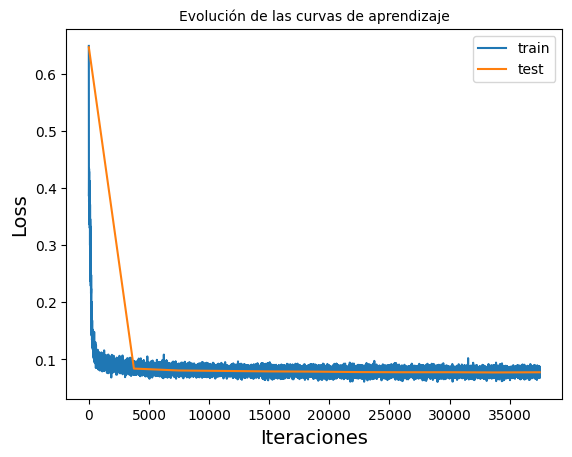

In [19]:
plt.plot(diag_train_losses, label='train')
plt.plot(np.linspace(0, len(diag_train_losses)-1, len(diag_test_losses)), diag_test_losses, label='test')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Evolución de las curvas de aprendizaje')
plt.savefig('rnn_diag_loss.pdf', bbox_inches='tight')
plt.show()

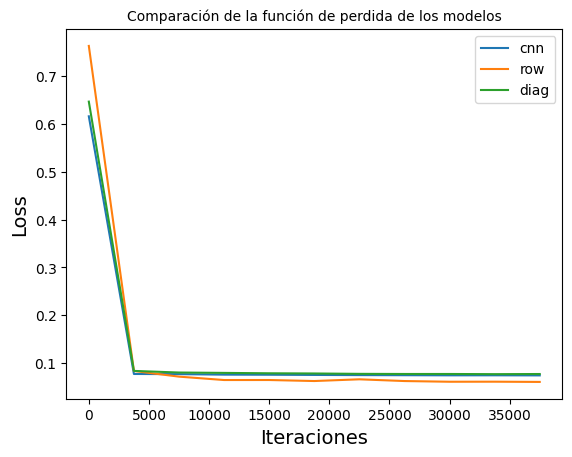

In [21]:
plt.plot(np.linspace(0, len(cnn_train_losses)-1, len(cnn_test_losses)), cnn_test_losses, label='cnn')
plt.plot(np.linspace(0, len(row_train_losses)-1, len(row_test_losses)), row_test_losses, label='row')
plt.plot(np.linspace(0, len(diag_train_losses)-1, len(diag_test_losses)), diag_test_losses, label='diag')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Comparación de la función de perdida de los modelos')
plt.show()

# Inferencia

In [2]:
pixel_cnn = PixelCNN_model(num_channels=1, num_filters=32, num_layers=15)
pixel_cnn.load_state_dict(torch.load('models/pixel_cnn'))

diag_pixel_rnn = PixelRNN_model(num_layers=4, num_filters=16, input_size=28, type_rnn='diagonal')
diag_pixel_rnn.load_state_dict(torch.load('models/pixel_diag'))

row_pixel_rnn = PixelRNN_model(num_layers=4, num_filters=16, input_size=28, type_rnn='row')
row_pixel_rnn.load_state_dict(torch.load('models/pixel_row'))

<All keys matched successfully>

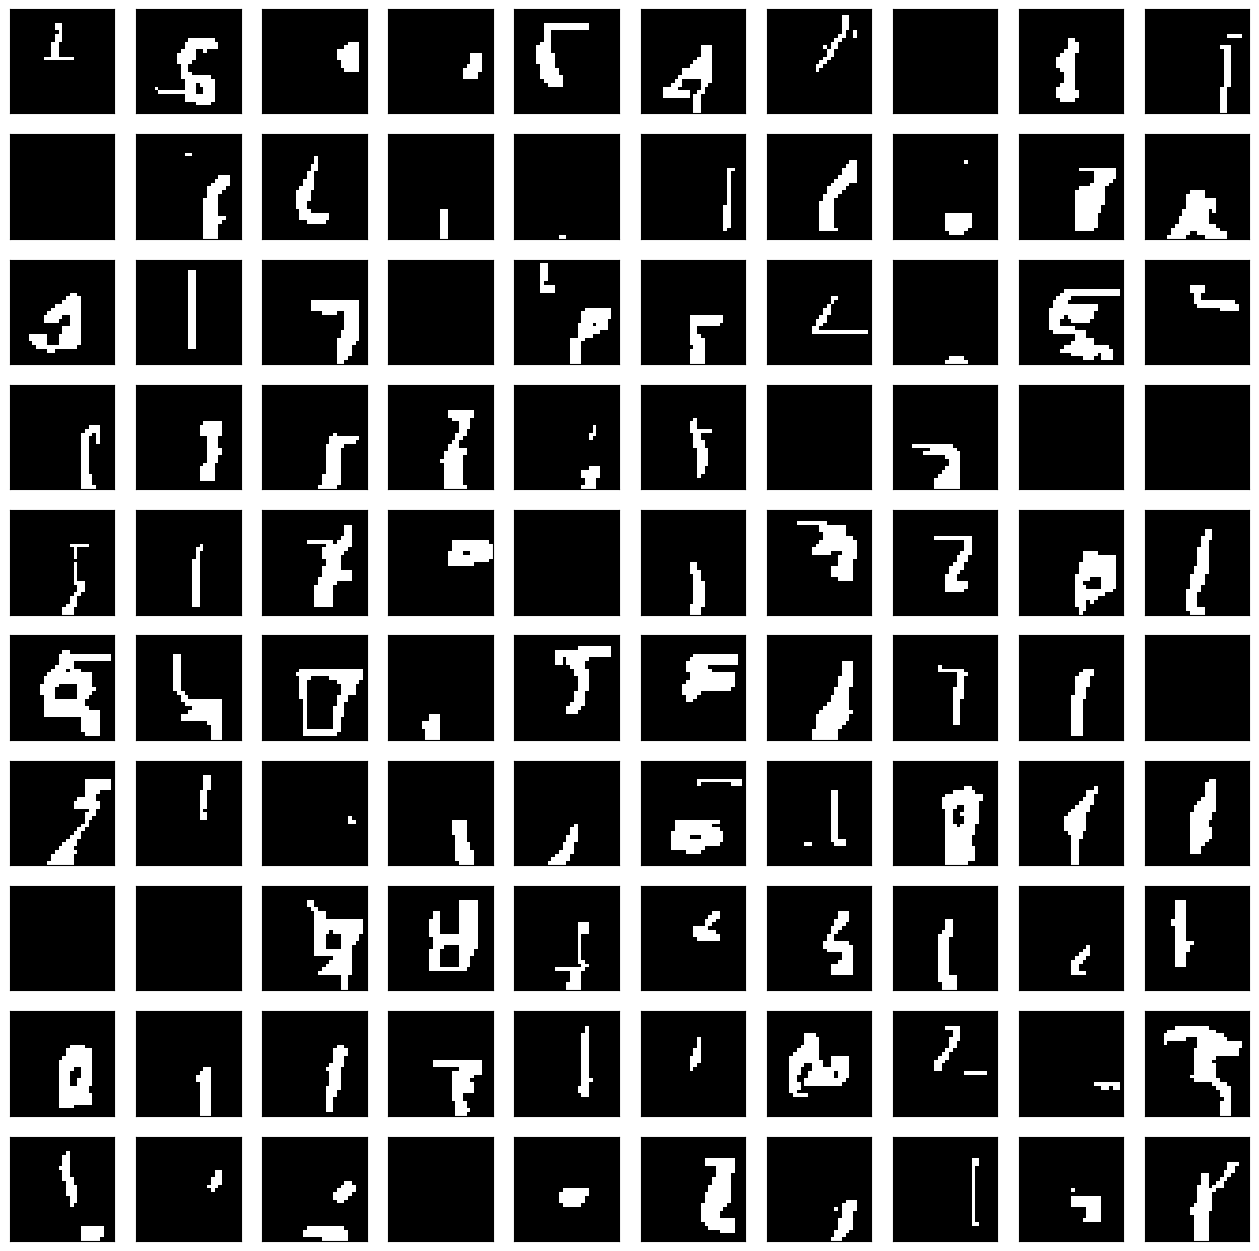

In [5]:
plot_samples(pixel_cnn, 100)
plt.savefig('cnn.pdf', bbox_inches='tight')

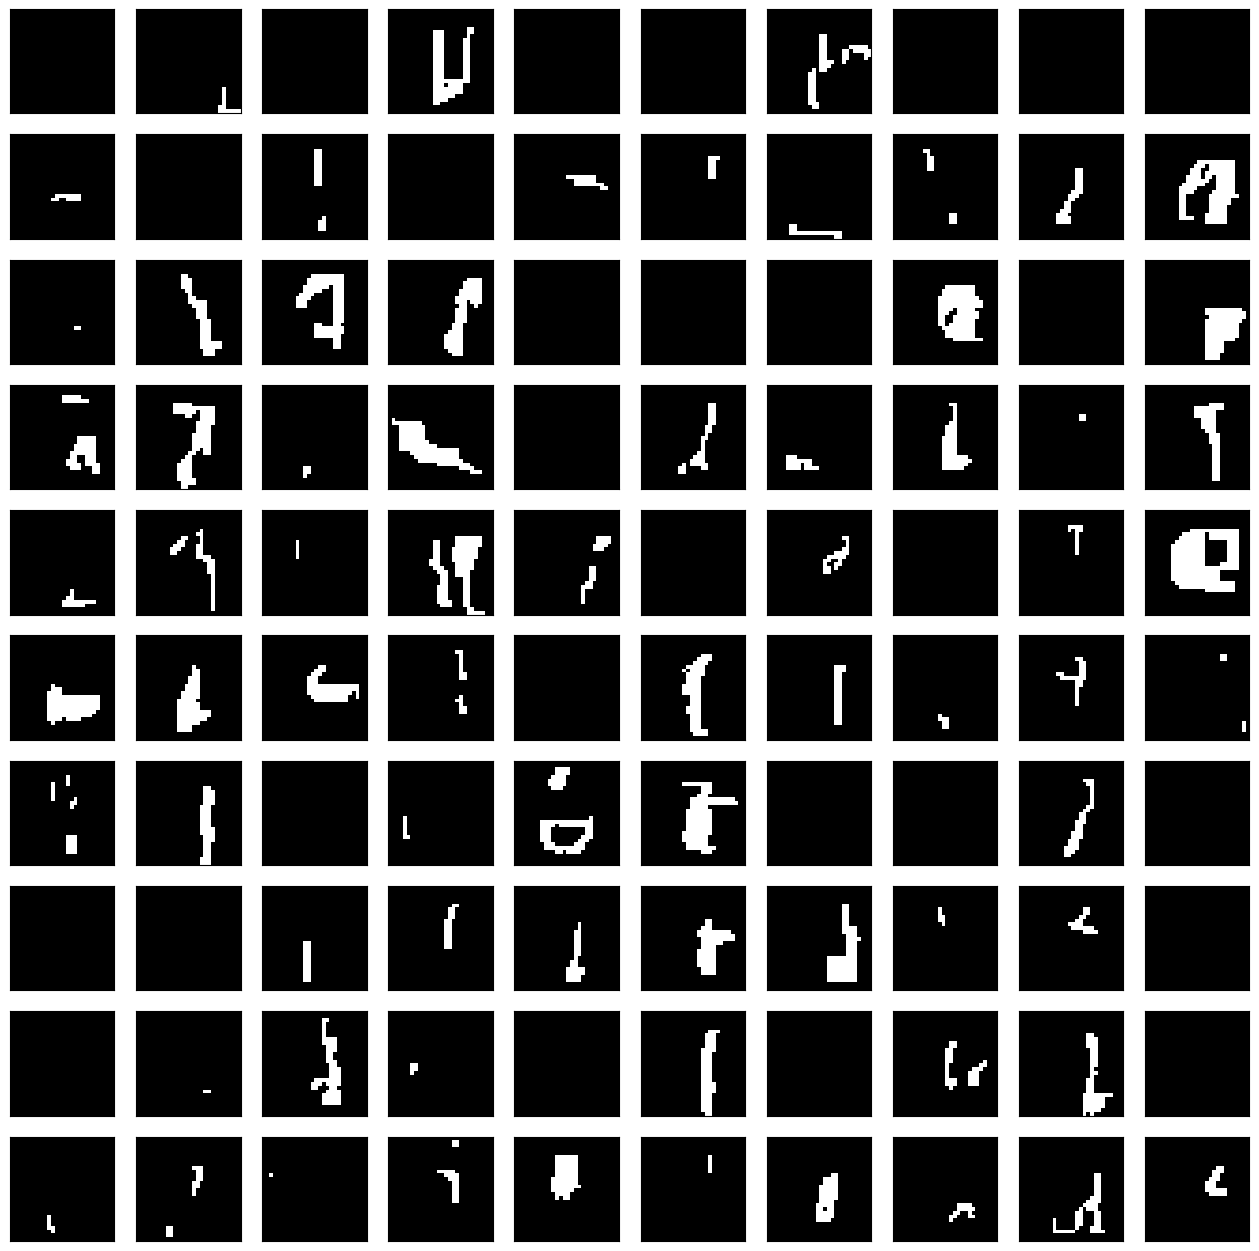

In [20]:
plot_samples(diag_pixel_rnn, 100)
plt.savefig('diag.pdf', bbox_inches='tight')

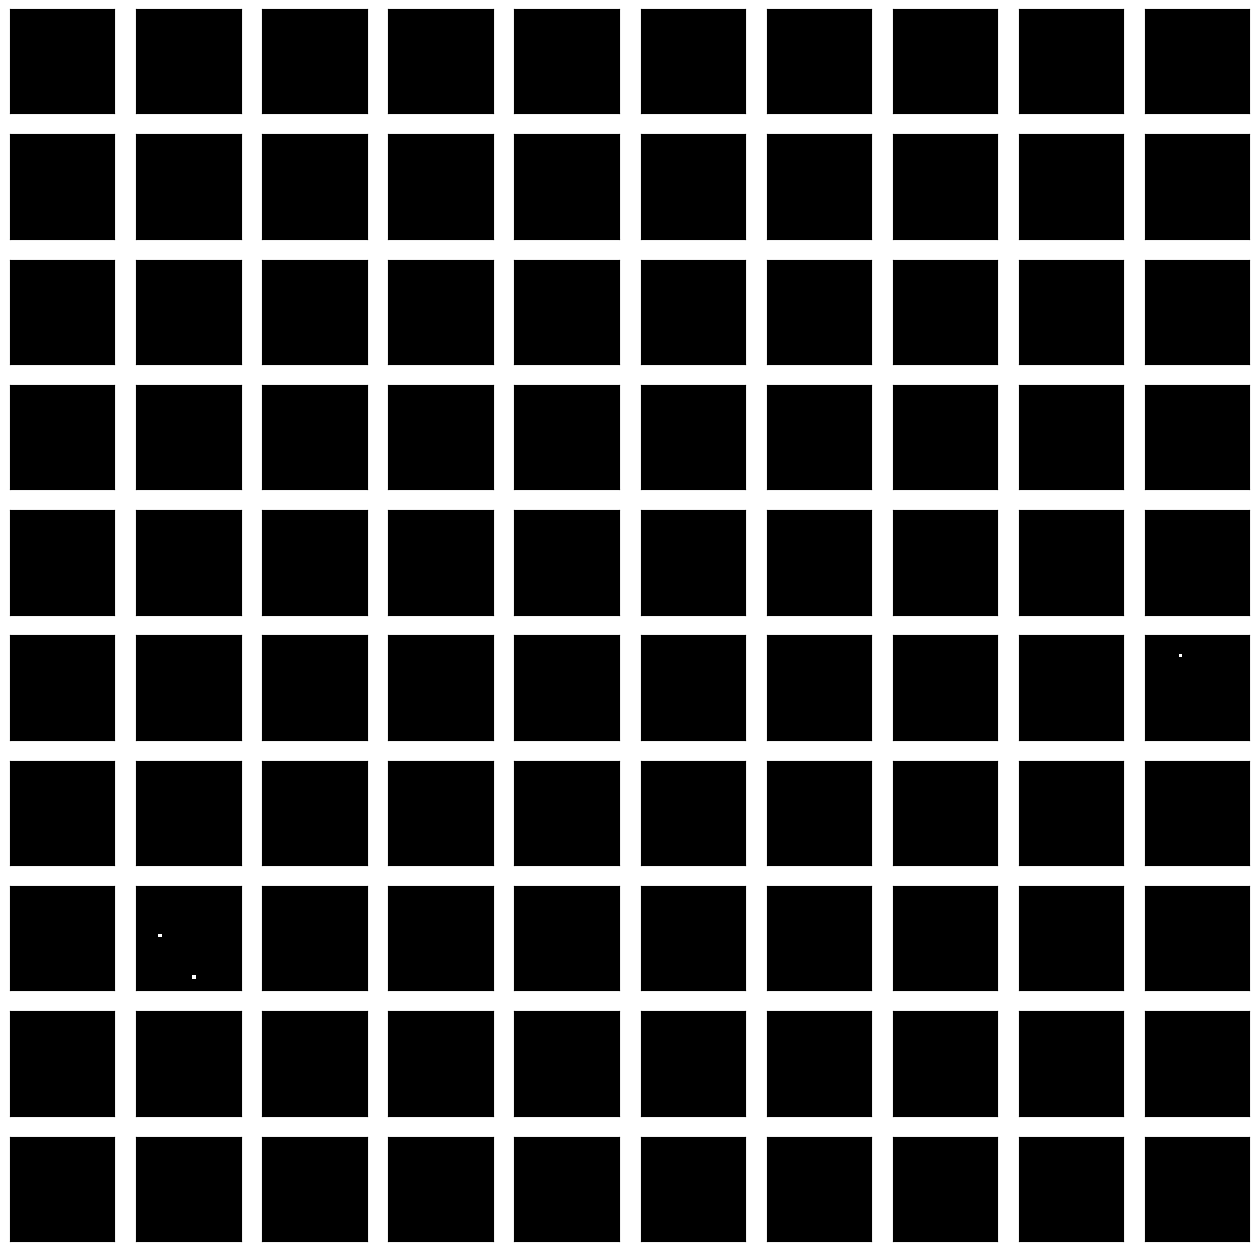

In [16]:
plot_samples(row_pixel_rnn, 100)
plt.savefig('row.pdf', bbox_inches='tight')

In [8]:
N = [20, 60, 100, 140, 180]
tiempos_inferencia_cnn = []
tiempos_inferencia_rnn_row = []
tiempos_inferencia_rnn_diag = []

for n_samples in N:
    print(n_samples)
    start_time = time.time()
    sample = sampling(pixel_cnn, num_samples=n_samples)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Pixel CNN: {execution_time} segundos")
    tiempos_inferencia_cnn.append(execution_time)

    start_time = time.time()
    sample = sampling(row_pixel_rnn, num_samples=n_samples)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Pixel Row LSTM: {execution_time} segundos")
    tiempos_inferencia_rnn_row.append(execution_time)

    start_time = time.time()
    sample = sampling(diag_pixel_rnn, num_samples=n_samples)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Pixel Diag LSTM: {execution_time} segundos\n")
    tiempos_inferencia_rnn_diag.append(execution_time)

20
Pixel CNN: 4.346391677856445 segundos
Pixel Row LSTM: 33.833921670913696 segundos
Pixel Diag LSTM: 73.40087676048279 segundos

60
Pixel CNN: 13.001249551773071 segundos
Pixel Row LSTM: 33.366443395614624 segundos
Pixel Diag LSTM: 74.3768961429596 segundos

100
Pixel CNN: 21.426378965377808 segundos
Pixel Row LSTM: 34.402127742767334 segundos
Pixel Diag LSTM: 67.58090257644653 segundos

140
Pixel CNN: 29.49557590484619 segundos
Pixel Row LSTM: 34.30484938621521 segundos
Pixel Diag LSTM: 69.36916613578796 segundos

180
Pixel CNN: 37.658687591552734 segundos
Pixel Row LSTM: 33.65552997589111 segundos
Pixel Diag LSTM: 84.6767828464508 segundos



In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=N, y=tiempos_inferencia_cnn, mode='lines', name='PixelCNN'))
fig.add_trace(go.Scatter(x=N, y=tiempos_inferencia_rnn_row, mode='lines', name='PixelRNN RowLSTM'))
fig.add_trace(go.Scatter(x=N, y=tiempos_inferencia_rnn_diag, mode='lines', name='PixelRNN DiagLSTM'))
fig.update_layout(
    title='Comparación de tiempos de inferencia',
    title_x=0.5,
    title_y=0.9,
    xaxis_title='Número de muestras',
    yaxis_title='Segundos',
    height=750,
    width=800,
    template='simple_white'
)

fig.show()